In [1]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score

import pandas as pd
import numpy as np
import re

### Define Metrics

In [2]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

### This method creates classification integer
Positive tweets : 1
Neutral tweets : 0
Negative tweets : -1

In [3]:
#New column for classification labels, either 1 or 0
def scoreCol(df, text_field):
    scores = []
    for x in df[text_field]:
        if x == 'Bullish':
            x = 1
            
        elif x == 'Bearish':
            x = 0
         
        #else:
            #print(':(')
            
        scores.append(x)        
    df['scores'] = scores
    return df

### Read in dataset
The first dataset is going to be the cleaned dataset

In [4]:
#Read data into dataframe
#data = pd.read_csv(r'C:\Users\rsisl\source\repos\NLP_Web_Scraping\notebooks\13-baseline-modelling\cleanData.csv')
data = pd.read_csv(r'..\cleanData.csv')
data.head(3)

,user,message_id,sentiment,content,date,time,securities,tweet text,tokens,num_of_tokens,tokens_in_transformed_text,num_of_tokens_in_transformed_text
0,babybounce,/babybounce/message/226382374,Bullish,$BA travel going green bullish $CCL $RCL $NCLH...,09/07/2020,12:21:03,"['$BA', '$CCL', '$RCL', '$NCLH', '$SPY']",travel going green bullish,"['travel', 'going', 'green', 'bullish']",4,"['travel', 'go', 'green', 'bullish']",4
1,L1_Trading,/L1_Trading/message/226381562,Bullish,$SPY let’s go mooning today,09/07/2020,12:21:03,['$SPY'],let’s go mooning today,"['let', 'go', 'mooning', 'today']",4,"['let', 'go', 'moon', 'today']",4
2,Economist4401,/Economist4401/message/226381511,Bearish,$SPY $SPX $DJIA $DIA $QQQ Analysts on US stock...,09/07/2020,12:21:03,"['$SPY', '$SPX', '$DJIA', '$DIA', '$QQQ']","Analysts on US stock markets: 1. On Monday, Bl...","['analysts', 'us', 'stock', 'markets', 'monday...",58,"['analyst', 'us', 'stock', 'market', 'monday',...",37


In [5]:
#Call classification label method
data = scoreCol(data,'sentiment')
data.head(3)

,user,message_id,sentiment,content,date,time,securities,tweet text,tokens,num_of_tokens,tokens_in_transformed_text,num_of_tokens_in_transformed_text,scores
0,babybounce,/babybounce/message/226382374,Bullish,$BA travel going green bullish $CCL $RCL $NCLH...,09/07/2020,12:21:03,"['$BA', '$CCL', '$RCL', '$NCLH', '$SPY']",travel going green bullish,"['travel', 'going', 'green', 'bullish']",4,"['travel', 'go', 'green', 'bullish']",4,1
1,L1_Trading,/L1_Trading/message/226381562,Bullish,$SPY let’s go mooning today,09/07/2020,12:21:03,['$SPY'],let’s go mooning today,"['let', 'go', 'mooning', 'today']",4,"['let', 'go', 'moon', 'today']",4,1
2,Economist4401,/Economist4401/message/226381511,Bearish,$SPY $SPX $DJIA $DIA $QQQ Analysts on US stock...,09/07/2020,12:21:03,"['$SPY', '$SPX', '$DJIA', '$DIA', '$QQQ']","Analysts on US stock markets: 1. On Monday, Bl...","['analysts', 'us', 'stock', 'markets', 'monday...",58,"['analyst', 'us', 'stock', 'market', 'monday',...",37,0


Get list of Tokens for each tweet

Create the list_corpus and the labels:

In [6]:
# Create list_corpus
token_list = data['tweet text'].tolist()
list_corpus = []
for tokens in token_list:
    tokens = str(tokens) 
    tokens = tokens.replace("[","").replace("]","").replace("'","").replace(",","")
    list_corpus.append(tokens)
print(list_corpus[:5])


['travel going green bullish', 'let’s go mooning today', 'Analysts on US stock markets: 1. On Monday BlackRock downgraded US stocks from “overweight” to “neutral.” 2. Gary Shilling is very bearish on stock markets. He expects them to crash between 30% and 40% over the next year. 3. If Biden becomes president and raises taxes that President Trump lowered it could lead to upheaval and a possible crash in US stock markets. marketrealist.com/2020/07/w...', 'more China. China wants some of Australia lol🦘🦘🦘🦘', '“What Does The Institutional Ownership Tell Us About Greenlane Holdings? Many institutions measure their performance against an index that approximates the local market. So they usually pay more attention to companies that are included in major indices. We can see that Greenlane Holdings does have institutional investors; and they hold a good portion of the company’s stock. This implies the analysts working for those institutions have looked at the stock and they like it.” FB@risksava

In [7]:
# Get labels
list_labels = []
for l in data['scores'].tolist():
    label = int(l)
    list_labels.append(label)

In [8]:
#Do a check...
print(list_corpus[:5])
print(list_labels[:5])

['travel going green bullish', 'let’s go mooning today', 'Analysts on US stock markets: 1. On Monday BlackRock downgraded US stocks from “overweight” to “neutral.” 2. Gary Shilling is very bearish on stock markets. He expects them to crash between 30% and 40% over the next year. 3. If Biden becomes president and raises taxes that President Trump lowered it could lead to upheaval and a possible crash in US stock markets. marketrealist.com/2020/07/w...', 'more China. China wants some of Australia lol🦘🦘🦘🦘', '“What Does The Institutional Ownership Tell Us About Greenlane Holdings? Many institutions measure their performance against an index that approximates the local market. So they usually pay more attention to companies that are included in major indices. We can see that Greenlane Holdings does have institutional investors; and they hold a good portion of the company’s stock. This implies the analysts working for those institutions have looked at the stock and they like it.” FB@risksava

In [9]:
data[['sentiment','scores']].head()

,sentiment,scores
0,Bullish,1
1,Bullish,1
2,Bearish,0
3,Bearish,0
4,Bullish,1


### Create TF-IDF Vectorizer  - use the list corpus to create a CM 

In [10]:
# Convert all review documents to a sparse matrix of token counts
vectorizer = TfidfVectorizer() 
termDocumentMatrix = vectorizer.fit_transform(list_corpus) #this needs to include encoded tokens

In [11]:
termDocumentMatrix.shape #add additional column - 'user_encoded'

(24284, 19675)

In [20]:
#Split the training dataset into two sections: 
x_train_tx, x_test_tx, y_train_tx, y_test_tx = train_test_split(termDocumentMatrix, list_labels, test_size = 0.2)

In [21]:
print(x_train.shape)
print(x_test.shape)

(19427, 4124)
(4857, 4124)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier()

In [ ]:
gb.fit(x_train, y_train)

In [ ]:
y_predicted_counts_gb = gb.predict(x_test)

In [ ]:
accuracy_gb, precision_gb, recall_gb, f1_gb = get_metrics(y_test, y_predicted_counts_gb)

In [ ]:
accuracy_gb, precision_gb, recall_gb, f1_gb

In [ ]:
print("data = cleaned Dataset: vectorizer = TfidfVectorizer, accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_gb, precision_gb, recall_gb, f1_gb))
import pylab as pl
import matplotlib.pyplot as plt
print("data = cleaned Dataset: vectorizer = CountVectorizer, accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_gb, precision_gb, recall_gb, f1_gb))
labels = [1,0]
cm = metrics.confusion_matrix(y_test,y_predicted_counts_gb, labels)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(cm)

In [ ]:
#label_encoder inside sklearn pre-propecessing (to incorporate users into x_train and x_test dataset)

In [ ]:
#Create a Multinominal Classifier
mnb = MultinomialNB()

In [ ]:
#Train the model using the training sets
mnb.fit(x_train, y_train)

In [ ]:
#Predict the response for test dataset
y_predicted_counts = mnb.predict(x_test)

In [ ]:
accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)

In [ ]:
accuracy, precision, recall, f1

In [ ]:
print("data = cleaned Dataset: vectorizer = TfidfVectorizer, accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))
import pylab as pl
import matplotlib.pyplot as plt
print("data = cleaned Dataset: vectorizer = CountVectorizer, accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))
labels = [1,0]
cm = metrics.confusion_matrix(y_test,y_predicted_counts, labels)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(cm)

### Create TF-IDF Vectorizer - use the 'user' column to create a CM

In [22]:
# Convert all review documents to a sparse matrix of token counts
vectorizer = TfidfVectorizer() 
termDocumentMatrix_user = vectorizer.fit_transform(data['user'].tolist()) #this needs to include encoded tokens

In [23]:
#Split the training dataset into two sections: 
x_train, x_test, y_train, y_test = train_test_split(termDocumentMatrix_user, list_labels, test_size = 0.2)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_user = GradientBoostingClassifier()

In [ ]:
gb_user.fit(x_train, y_train)

In [ ]:
y_predicted_counts_gb_user = gb_user.predict(x_test)

In [ ]:
accuracy_gb_user, precision_gb_user, recall_gb_user, f1_gb_user = get_metrics(y_test, y_predicted_counts_gb_user)

In [ ]:
accuracy_gb_user, precision_gb_user, recall_gb_user, f1_gb_user

In [ ]:
print("data = cleaned Dataset: vectorizer = TfidfVectorizer, accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_gb_user, precision_gb_user, recall_gb_user, f1_gb_user))
import pylab as pl
import matplotlib.pyplot as plt
print("data = cleaned Dataset: vectorizer = CountVectorizer, accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_gb_user, precision_gb_user, recall_gb_user, f1_gb_user))
labels = [1,0]
cm = metrics.confusion_matrix(y_test, y_predicted_counts_gb_user, labels)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(cm)

In [ ]:
#Create a Multinominal Classifier
mnb_user = MultinomialNB()

In [ ]:
#Train the model using the training sets
mnb_user.fit(x_train, y_train)

In [ ]:
#Predict the response for test dataset
y_predicted_counts_user = mnb_user.predict(x_test)

In [ ]:
accuracy_user, precision_user, recall_user, f1_user = get_metrics(y_test, y_predicted_counts_user)

In [ ]:
print("data = cleaned Dataset: vectorizer = TfidfVectorizer, accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_user, precision_user, recall_user, f1_user))
import pylab as pl
import matplotlib.pyplot as plt
print("data = cleaned Dataset: vectorizer = CountVectorizer, accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_user, precision_user, recall_user, f1_user))
labels = [1,0]
cm = metrics.confusion_matrix(y_test,y_predicted_counts, labels)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(cm)

Column combine 1st try

In [43]:
#Split the training dataset into two sections: 
x_train_tx, x_test_tx, y_train_tx, y_test_tx = train_test_split(termDocumentMatrix, list_labels, test_size = 0.2)

In [44]:
#Split the training dataset into two sections: 
x_train, x_test, y_train, y_test = train_test_split(termDocumentMatrix_user, list_labels, test_size = 0.2)

In [45]:
print(x_train.shape)
print(x_train_tx.shape)

(19427, 4124)
(19427, 19675)


In [46]:
x_train

<19427x4124 sparse matrix of type '<class 'numpy.float64'>'
	with 19427 stored elements in Compressed Sparse Row format>

In [47]:
x_train_tx

<19427x19675 sparse matrix of type '<class 'numpy.float64'>'
	with 278027 stored elements in Compressed Sparse Row format>

In [48]:
x_train_user = pd.DataFrame(x_train.astype(int).toarray())
x_test_user = pd.DataFrame(x_test.astype(int).toarray())
x_train_text = pd.DataFrame(x_train_tx.astype(int).toarray())
x_test_text = pd.DataFrame(x_test_tx.astype(int).toarray())

MemoryError: Unable to allocate 1.42 GiB for an array with shape (19427, 19675) and data type int32

In [42]:
x_train_tx = pd.DataFrame(cvec.transform(x_train_tx).todense(),
                         columns=cvec.get_feature_names())

NameError: name 'cvec' is not defined

In [ ]:
train = pd.concat([x_train_tx,x_train], axis=1)
test = pd.concat([x_test_tx, x_test], axis=1)
print(train.shape)
print(test.shape)
print(y_train)
print(y_test)

In [56]:
data[['user','tweet text']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24284 entries, 0 to 24283
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user        24284 non-null  object
 1   tweet text  24242 non-null  object
dtypes: object(2)
memory usage: 189.8+ KB


2nd Column combination attempt 

In [66]:

#df = pd.DataFrame(data[['user','tweet text']]).astype(str)
data['data_comb'] = data['user'].astype(str) + ' '+ data['tweet text'].astype(str)
#df[data_comb] = df[['user','tweet text']].apply(lambda x: ''.join(x), axis=1)
data.head(3)


,user,message_id,sentiment,content,date,time,securities,tweet text,tokens,num_of_tokens,tokens_in_transformed_text,num_of_tokens_in_transformed_text,scores,data_comb
0,babybounce,/babybounce/message/226382374,Bullish,$BA travel going green bullish $CCL $RCL $NCLH...,09/07/2020,12:21:03,"['$BA', '$CCL', '$RCL', '$NCLH', '$SPY']",travel going green bullish,"['travel', 'going', 'green', 'bullish']",4,"['travel', 'go', 'green', 'bullish']",4,1,babybounce travel going green bullish
1,L1_Trading,/L1_Trading/message/226381562,Bullish,$SPY let’s go mooning today,09/07/2020,12:21:03,['$SPY'],let’s go mooning today,"['let', 'go', 'mooning', 'today']",4,"['let', 'go', 'moon', 'today']",4,1,L1_Trading let’s go mooning today
2,Economist4401,/Economist4401/message/226381511,Bearish,$SPY $SPX $DJIA $DIA $QQQ Analysts on US stock...,09/07/2020,12:21:03,"['$SPY', '$SPX', '$DJIA', '$DIA', '$QQQ']","Analysts on US stock markets: 1. On Monday, Bl...","['analysts', 'us', 'stock', 'markets', 'monday...",58,"['analyst', 'us', 'stock', 'market', 'monday',...",37,0,Economist4401 Analysts on US stock markets: 1....


In [67]:
# Create list_corpus
token_list = data['data_comb'].tolist()
list_corpus = []
for tokens in token_list:
    tokens = str(tokens) 
    tokens = tokens.replace("[","").replace("]","").replace("'","").replace(",","")
    list_corpus.append(tokens)
print(list_corpus[:5])


['babybounce travel going green bullish', 'L1_Trading let’s go mooning today', 'Economist4401 Analysts on US stock markets: 1. On Monday BlackRock downgraded US stocks from “overweight” to “neutral.” 2. Gary Shilling is very bearish on stock markets. He expects them to crash between 30% and 40% over the next year. 3. If Biden becomes president and raises taxes that President Trump lowered it could lead to upheaval and a possible crash in US stock markets. marketrealist.com/2020/07/w...', 'OkieOkie more China. China wants some of Australia lol🦘🦘🦘🦘', 'risksavage_inthemarket “What Does The Institutional Ownership Tell Us About Greenlane Holdings? Many institutions measure their performance against an index that approximates the local market. So they usually pay more attention to companies that are included in major indices. We can see that Greenlane Holdings does have institutional investors; and they hold a good portion of the company’s stock. This implies the analysts working for those 

In [68]:
#Do a check...
print(list_corpus[:5])
print(list_labels[:5])

['babybounce travel going green bullish', 'L1_Trading let’s go mooning today', 'Economist4401 Analysts on US stock markets: 1. On Monday BlackRock downgraded US stocks from “overweight” to “neutral.” 2. Gary Shilling is very bearish on stock markets. He expects them to crash between 30% and 40% over the next year. 3. If Biden becomes president and raises taxes that President Trump lowered it could lead to upheaval and a possible crash in US stock markets. marketrealist.com/2020/07/w...', 'OkieOkie more China. China wants some of Australia lol🦘🦘🦘🦘', 'risksavage_inthemarket “What Does The Institutional Ownership Tell Us About Greenlane Holdings? Many institutions measure their performance against an index that approximates the local market. So they usually pay more attention to companies that are included in major indices. We can see that Greenlane Holdings does have institutional investors; and they hold a good portion of the company’s stock. This implies the analysts working for those 

In [69]:
data[['sentiment','scores']].head()

,sentiment,scores
0,Bullish,1
1,Bullish,1
2,Bearish,0
3,Bearish,0
4,Bullish,1


In [70]:
# Convert all review documents to a sparse matrix of token counts
vectorizer = TfidfVectorizer() 
termDocumentMatrix = vectorizer.fit_transform(list_corpus) #this needs to include encoded tokens

In [71]:
termDocumentMatrix.shape #add additional column - 'user_encoded'

(24284, 23636)

In [72]:
#Split the training dataset into two sections: 
x_train_cb, x_test_cb, y_train_cb, y_test_cb = train_test_split(termDocumentMatrix, list_labels, test_size = 0.2)

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
gb_cb = GradientBoostingClassifier()

In [75]:
gb_cb.fit(x_train_cb, y_train_cb)

GradientBoostingClassifier()

In [78]:
y_predicted_counts_gb_cb = gb_cb.predict(x_test_cb)

In [79]:
accuracy_gb_cb, precision_gb_cb, recall_gb_cb, f1_gb_cb = get_metrics(y_test_cb, y_predicted_counts_gb_cb)

In [80]:
accuracy_gb_cb, precision_gb_cb, recall_gb_cb, f1_gb_cb

(0.72863907761993, 0.7565429373968696, 0.72863907761993, 0.7082596355856825)

data = cleaned Dataset: vectorizer = TfidfVectorizer, accuracy = 0.729, precision = 0.757, recall = 0.729, f1 = 0.708
data = cleaned Dataset: vectorizer = CountVectorizer, accuracy = 0.729, precision = 0.757, recall = 0.729, f1 = 0.708


C:\Users\linda\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


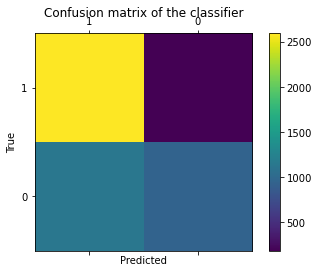

[[2593  183]
 [1135  946]]


In [81]:
print("data = cleaned Dataset: vectorizer = TfidfVectorizer, accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_gb_cb, precision_gb_cb, recall_gb_cb, f1_gb_cb))
import pylab as pl
import matplotlib.pyplot as plt
print("data = cleaned Dataset: vectorizer = CountVectorizer, accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_gb_cb, precision_gb_cb, recall_gb_cb, f1_gb_cb))
labels = [1,0]
cm = metrics.confusion_matrix(y_test_cb,y_predicted_counts_gb_cb, labels)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(cm)

In [82]:
#Create a Multinominal Classifier
mnb_cb = MultinomialNB()

In [84]:
#Train the model using the training sets
mnb_cb.fit(x_train_cb, y_train_cb)

MultinomialNB()

In [86]:
#Predict the response for test dataset
y_predicted_counts_cb = mnb_cb.predict(x_test_cb)

In [87]:
accuracy_cb, precision_cb ,recall_cb, f1_cb = get_metrics(y_test_cb, y_predicted_counts_cb)

In [88]:
accuracy_cb, precision_cb ,recall_cb, f1_cb

(0.8567016676961087,
 0.8586716755221726,
 0.8567016676961087,
 0.8551483231341568)

data = cleaned Dataset: vectorizer = TfidfVectorizer, accuracy = 0.857, precision = 0.859, recall = 0.857, f1 = 0.855
data = cleaned Dataset: vectorizer = CountVectorizer, accuracy = 0.857, precision = 0.859, recall = 0.857, f1 = 0.855


C:\Users\linda\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


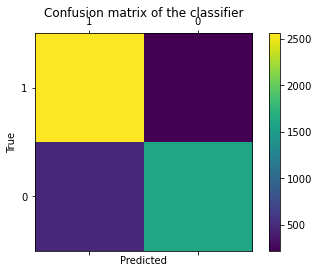

[[2557  219]
 [ 477 1604]]


In [89]:
print("data = cleaned Dataset: vectorizer = TfidfVectorizer, accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_cb, precision_cb ,recall_cb, f1_cb))
import pylab as pl
import matplotlib.pyplot as plt
print("data = cleaned Dataset: vectorizer = CountVectorizer, accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_cb, precision_cb ,recall_cb, f1_cb))
labels = [1,0]
cm = metrics.confusion_matrix(y_test_cb,y_predicted_counts_cb, labels)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(cm)

### Cross fold validation 

In [ ]:
print(len(vectorizer.get_feature_names()))

In [ ]:
print(termDocumentMatrix.toarray())

In [ ]:
real_pred = pd.DataFrame({'y_true':y_test, 'y_pred':y_predicted_counts})
real_pred

In [ ]:
cv_results = cross_val_score(mnb, x_train, y_train, scoring = 'accuracy', cv=5, n_jobs=-1)

In [ ]:
cv_results

In [ ]:
print("Accuracy archived: {0} %".format( round(accuracy_score(real_pred['y_true'],real_pred['y_pred']), 2)))

In [ ]:
print(classification_report(real_pred['y_true'],real_pred['y_pred']))